In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
raw_df = pd.read_excel("results/resultados consolidados.xlsx")

In [7]:
raw_df.sort_values(by = ["dataset", "error"], ascending = [True, False])

,dataset,error,execution_time,method,n_tries,search_space
19,100_features_0.01_error.csv,35517.176555,6.798107,ipop,30,0.10
16,100_features_0.01_error.csv,35308.981491,156.410744,bipop,30,0.10
15,100_features_0.01_error.csv,35141.006821,194.554050,bipop,30,0.01
18,100_features_0.01_error.csv,35138.043885,8.723278,ipop,30,0.01
17,100_features_0.01_error.csv,0.000000,9.430588,exact-method,1,0.00
...,...,...,...,...,...,...
62,compas_metadata.csv,31583.079433,18.999577,ipop,30,0.01
67,credit-g_metadata.csv,14598.465272,0.607760,ipop,30,0.10
64,credit-g_metadata.csv,11706.073661,2.746188,bipop,30,0.01
65,credit-g_metadata.csv,11704.604490,2.123418,bipop,30,0.10


In [11]:
methods = raw_df['method'].unique()

In [33]:
def plot_barplot(x, y, title = None, x_label = None, y_label = None, savefig = False):    
    
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.barplot(x = x, y = y, color = "royalblue")
    ax.set_title(title)
    sns.despine()
    
    if savefig:
        fig.savefig(f"results/charts/{title}.png")

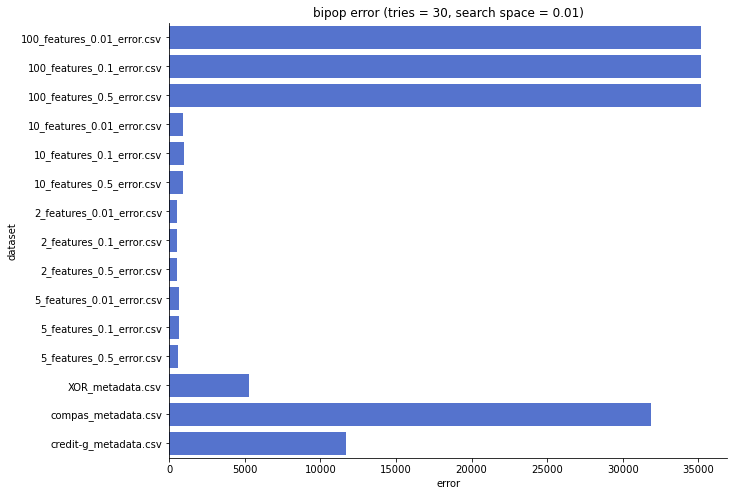

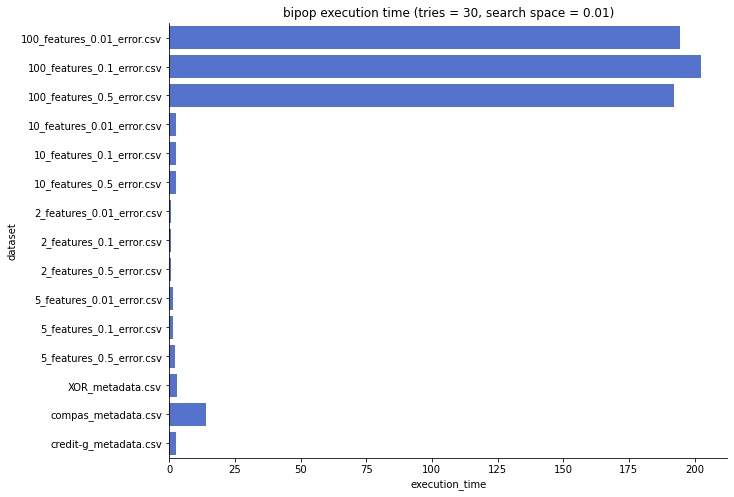

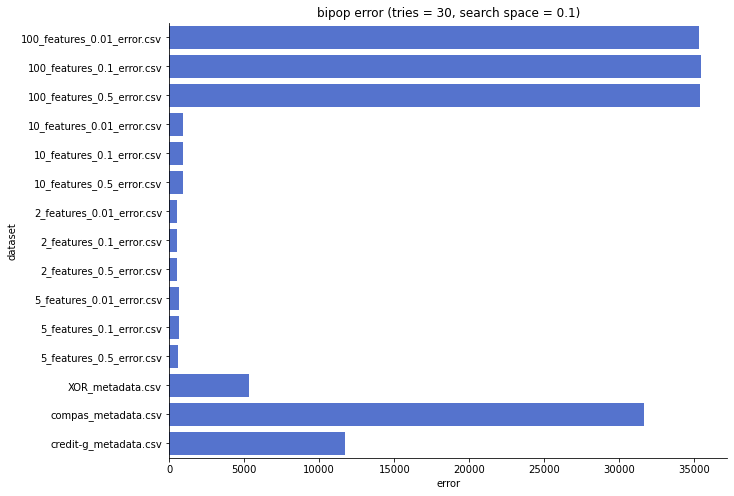

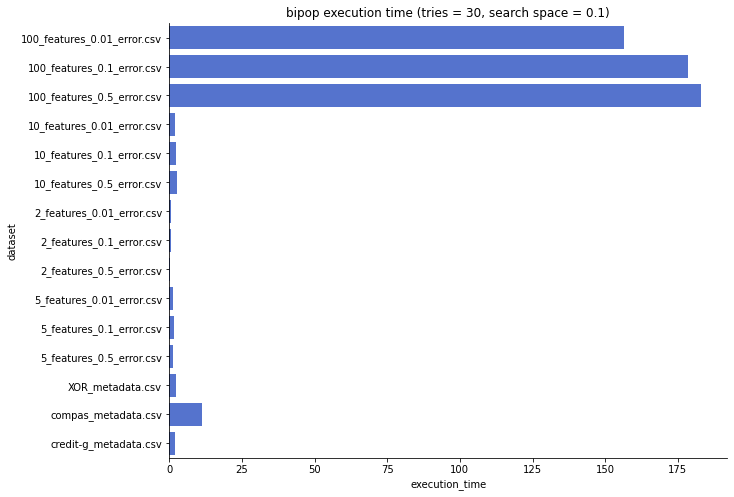

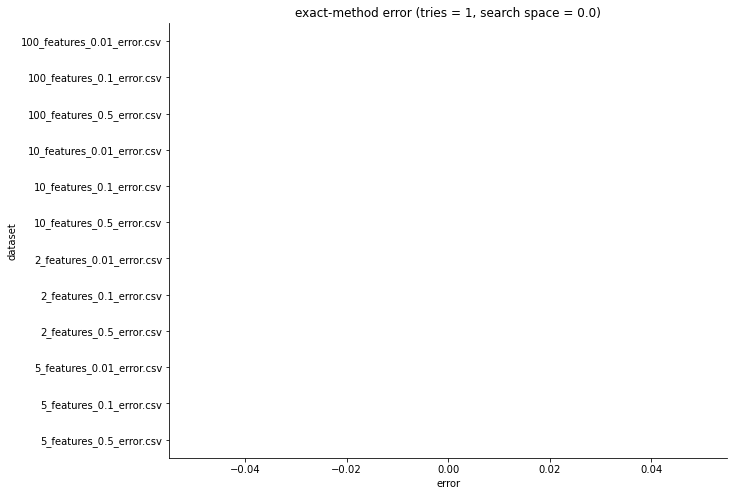

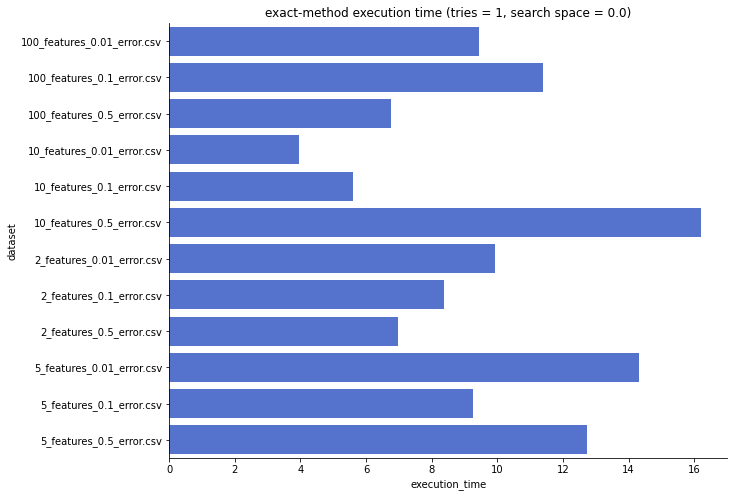

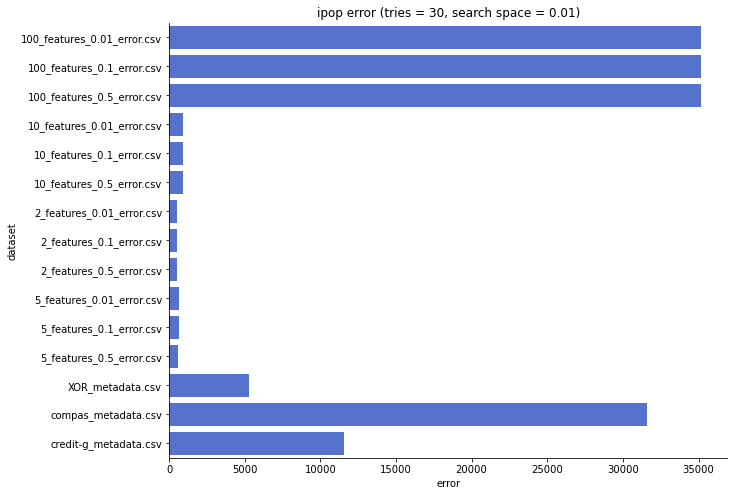

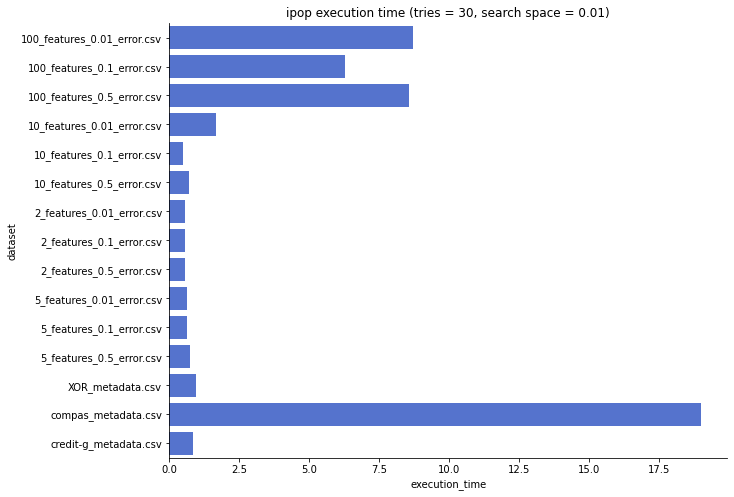

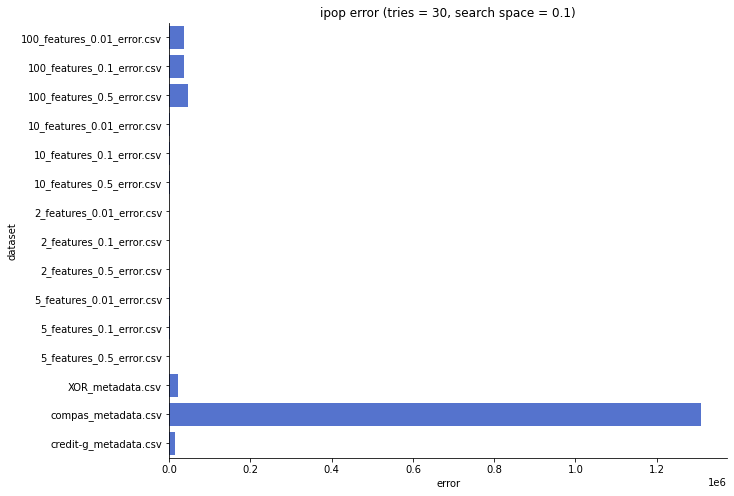

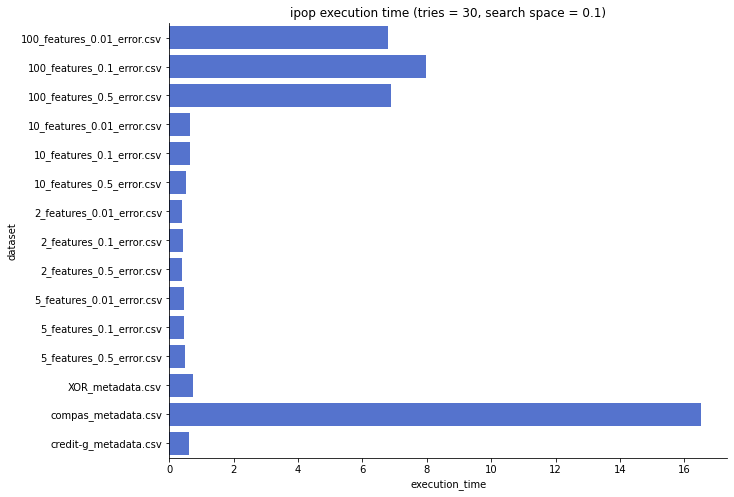

In [37]:
import itertools

for m in methods:
    df_subset = raw_df[raw_df["method"] == m]
    search_spaces = df_subset["search_space"].unique()
    n_tries = df_subset["n_tries"].unique()
    
    combinations = itertools.product(*[search_spaces, n_tries])
    for i in combinations:
        df_plot = df_subset[(df_subset["search_space"] == i[0]) &
                            (df_subset["n_tries"] == i[1]) 
                           ].sort_values(by = ["dataset"])
        
        
        plot_barplot(x = df_plot["error"], 
                     y = df_plot["dataset"], 
                     title = f"{m} error (tries = {i[1]}, search space = {i[0]})", 
                     savefig = True)
        plot_barplot(x = df_plot["execution_time"], 
                     y = df_plot["dataset"], 
                     title = f"{m} execution time (tries = {i[1]}, search space = {i[0]})",
                     x_label = "Execution time (seconds)",
                     savefig = True)
    
